In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rc("figure",   dpi=120, figsize=(6,4.8))

In [3]:
from cosmoslik import *

In [4]:
planck = load_cosmomc_chain("/home/marius/work/planck/chains/base/plikHM_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE");

In [5]:
# bao = load_cosmomc_chain("/home/marius/work/planck/chains/base/BAO_Cooke17_JLA/base_BAO_Cooke17_JLA")
# bao = load_cosmomc_chain("/home/marius/work/planck/chains/base/BAO_Cooke17/base_BAO_Cooke17")
bao = load_cosmomc_chain("/home/marius/work/planck/chains/base/BAO_Cooke17_Pantheon/base_BAO_Cooke17_Pantheon")

In [6]:
SH0ES = (74.03, 1.42)

$\alpha_{\rm BAO} = 0.2953 \pm 0.003962$

In [7]:
αBAO = 0.2953
σαBAO = 0.003962

In [8]:
rs = linspace(130,160)

In [9]:
lowl = load_cosmomc_chain("dat/pliklite_TT_lowl_lmax801_lowE/base_pliklite_TT_lowl_lmax801_lowE")
highl = load_cosmomc_chain("dat/pliklite_TT_lmin802_lowE/base_pliklite_TT_lmin802_lowE")

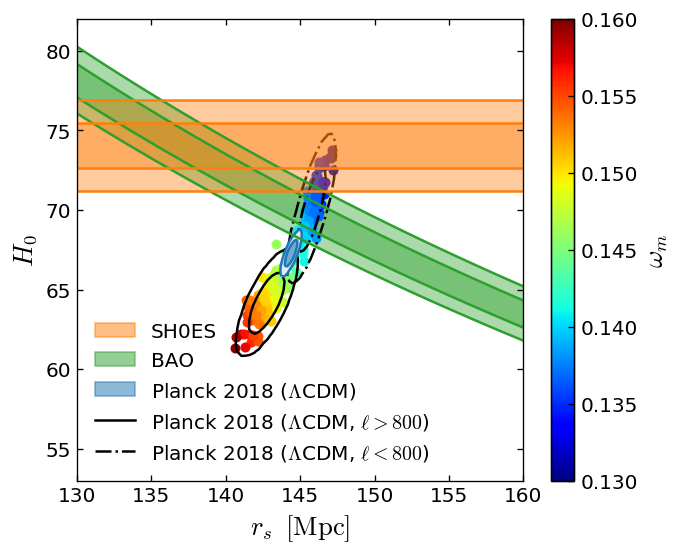

In [11]:
figure(figsize=(6,5))

# bao.join().like2d("rstar*","H0*", nbins=25, smooth=0.9, c="C3")

for nσ in (1,2):
    fill_between(rs, *(2.998e3/((αBAO+x*nσ*σαBAO)*rs) for x in (-1,1)), alpha=0.4, color="C2", lw=0, zorder=-1)
    for x in (-1,1):
        plot(rs, 2.998e3/((αBAO+x*nσ*σαBAO)*rs), color="C2")
    

planck.join().like2d("rstar*","H0*", nbins=25, smooth=0.9, c="C0", zorder=2)

lowl.join().like2d("rstar*","H0*", nbins=25, smooth=0.9, c="k", linestyles="-.", filled=False, zorder=1)
_,cax = lowl.join().likepoints("rstar*","H0*","omegamh2*", npoints=100, zorder=1, cmap=get_cmap("jet"), clim=(0.13,0.16))

highl.join().like2d("rstar*","H0*", nbins=25, smooth=0.9, c="k", linestyles="-", filled=False, zorder=1)
highl.join().likepoints("rstar*","H0*","omegamh2*", npoints=100, zorder=1, cmap=get_cmap("jet"), cax=cax, clim=(0.13,0.16))



for x in [1,2]:
    fill_between(xlim(), *[[SH0ES[0] + a*x*SH0ES[1]] for a in [-1,1]], color="C1", alpha=0.4, lw=0)
    for a in [-1,1]:
        plot(xlim(), [SH0ES[0] + a*x*SH0ES[1]]*2, color="C1")
    
xlabel(r"$r_s \;\; [\rm Mpc]$")
ylabel(r"$H_0$")

xlim(130,160)
ylim(53,82)

from matplotlib.patches import Patch

legend_elements = [
    
    Patch(color="C1", alpha=0.5, label="SH0ES"),
    Patch(color="C2", alpha=0.5, label="BAO"),
    Patch(color="C0", alpha=0.5, label="Planck 2018 ($\Lambda$CDM)"),
    Line2D([0],[0],c="k", label="Planck 2018 ($\Lambda$CDM, $\ell>800$)"),
    Line2D([0],[0],c="k", label="Planck 2018 ($\Lambda$CDM, $\ell<800$)", ls="-.")

]

cax.set_ylabel("$\omega_m$")

legend(handles=legend_elements, loc="lower left")
savefig("paper/Figures/rs-H0.pdf", bbox_inches="tight")

In [12]:
Line2D([0],[0],c="k",ls="-")